# Problem Introduction

I was curiosly following the data scientist roles in indian job listing sites and got an idea to make a project about the same!

But indian listings has a very few companies with estimated salary, hence i moved to glassdoor usa listing for the role 'Data Scientist' and wanted to findout the factors affecting the salary of data scientist role in USA.

The Glassdoor data has been scraped using the scraper code uploaded by 
- author: Kenarapfaik
- url: https://github.com/arapfaik/scraping-glassdoor-selenium

*(The same code has been uploaded as file 'Glassdoor_scraper.py' in the same Repository of this file.)*

The data set has following columns

- 'Unnamed: 0' - Data which has no importance
- 'Job Title' - job title
- 'Salary Estimate' - Salary range estimated
- 'Job Description' - Description of job
- 'Rating' - Rating of company
- 'Company Name' - Company name
- 'Location' - Location of job
- 'Headquarters' - Headquarters of company that posted job
- 'Size' - Size of company
- 'Founded' - Company founded in year
- 'Type of ownership' - Type of company ownership 
- 'Industry'- Inds=ustry in which job is posted
- 'Sector' - Sector of company that posted job
- 'Revenue' - Annual revenue of company
- 'Competitors' - Names of potential competetors of company


**For us modifed column of Salary Estimate to average of range will be the dependant variable**


In this notebook scope of work is until explorator data analysis, Data modelling has been uploaded in a seperate file in same repository as this

## Importing dataset & Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

import matplotlib.pyplot as plt

df = pd.read_csv('glassdoor_jobs.csv')

df['Job Title'].head()

0               Data Scientist
1    Healthcare Data Scientist
2               Data Scientist
3               Data Scientist
4               Data Scientist
Name: Job Title, dtype: object

## Feature Engineering

In [38]:
# Converting raw data of jpb titles into a certain group of roles and making a better modelling data 

# if any mentioned word in string is available in any of lines of job title 
# machine puts it into the assigned group of role

def title_simplifier(title): # defining the function
    if 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'machine' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title): # Assigning seniority column to see the trend
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or 'Chief' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or'junior' in title.lower():
        return 'jr'
    else:
        return 'na'

df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    560
data engineer     158
analyst           122
na                 55
manager            35
director           13
mle                13
Name: job_simp, dtype: int64

In [39]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        687
senior    266
jr          3
Name: seniority, dtype: int64

### Data Cleaning

In [40]:
# salary parsing -
# Company name text only - 
# state field - 
# age of company -
# Parsing of job Descr.


df = df[df['Salary Estimate'] != '-1'] # removing rows which had salary of '-1'



In [41]:
# Salary Data Cleaning


# If observed the data of salary column is ending with (Glassdoor est.), this is removed in the following code

salary = df['Salary Estimate'].str.split('(', expand = True)

# Some salaries have been mentioned on a hourly basis and these data is being preserved by making a 'hourly' column
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'Per Hour' in x.lower() else 0)



# Some salaries have been mentioned as employer proveided and etc basis 
# and these data is being preserved by making a 'employer provided' column

df['employer provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'Employer Provided Salary:' in x.lower() else 0)


# Salary rand column is in string format which makes it difficult for arithmetic operations, 
# hence we are replacing special notations and letters with ' '


salary[0] = salary[0].apply(lambda x: x.replace('K','').replace('$','').replace('Employer Provided Salary:','')
                           .replace(' Per Hour',''))

# Splitting the column of salary into two in order to make avegrage of salary posted
salary = salary[0].str.split('-', expand = True) 


salary[0] = salary[0].astype('int') # coverting salary dataframe which is made above into integer format.
salary[1] = salary[1].astype('int')

# finding Average Salary of range posted and creating a new column in main dataset
salary[2] = (salary[0] + salary[1])/2 
df['Avg_Salary'] = salary[2]

df = df.reset_index()
df.head()

,index,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,...,Type of ownership,Industry,Sector,Revenue,Competitors,job_simp,seniority,hourly,employer provided,Avg_Salary
0,0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,...,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,data scientist,na,0,0,72.0
1,1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,...,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,data scientist,na,0,0,87.5
2,2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,...,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,data scientist,na,0,0,85.0
3,3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,...,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",data scientist,na,0,0,76.5
4,4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,...,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",data scientist,na,0,0,114.5


In [42]:
# Company Name Extraction

# Extracting company name by using split method and removing '\n' in the string of company name

company = df['Company Name'].str.split('\n', expand = True)
company[0]=company[0].apply(lambda x: x.replace('<intent>', 'None'))# replacing un-necessary terms with nothing.

# as we have made a necessary dat afrom salary and campny columns,
# dropped the raw data columns from main set and forming new datafram


df2 = df.drop(['Salary Estimate','Company Name'], axis = 1)

df2['company'] = company[0]

df2['Rating'] = df2['Rating'].astype('float')


In [43]:
# Extracting State

df2 = df2[~(df2.index == 126)]

states = df2['Location'].str.split(',',expand = True)

states[~(states[0] == 'Santa Fe Springs')] 
# Excluding because this row has three string elements hence discarded the row

df2['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters  else 0, axis = 1)

df2[df2['same_state'] == 1]

df2['state'] = states[1]

In [44]:
# Age of company


df2['Founded'] = df2['Founded'].astype('float')

df2['company_age'] = df['Founded'].apply(lambda x: 2020 - x if x >0 else 0 )
# companies having age > 2020 had corrupt data of founding year


In [45]:
# Parsing Job Description
# Checking for skills in Python, RStudio, PySpark, Machine Learning, BigData

df2['python_yn'] = df2['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df2['vis_yn'] = df2['Job Description'].apply(lambda x: 1 if 'visualization' in x.lower() else 0)
df2['sql_yn'] = df2['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df2['sql_yn'] = df2['Job Description'].apply(lambda x: 1 if 'SQL' in x.lower() else 0)
df2['R_yn'] = df2['Job Description'].apply(lambda x: 1 if 'r Studio' in x.lower() else 0)
df2['R_yn'] = df2['Job Description'].apply(lambda x: 1 if 'rStudio' in x.lower() else 0)
df2['R_yn'] = df2['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)
df2['R_yn'] = df2['Job Description'].apply(lambda x: 1 if 'R' in x.lower() else 0)
df2['PySpark_yn'] = df2['Job Description'].apply(lambda x: 1 if 'PySpark' in x.lower() else 0)
df2['PySpark_yn'] = df2['Job Description'].apply(lambda x: 1 if 'Spark' in x.lower() else 0)
df2['PySpark_yn'] = df2['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df2['ML_yn'] = df2['Job Description'].apply(lambda x: 1 if 'machine learning' in x.lower() else 0)
df2['BigData_yn'] = df2['Job Description'].apply(lambda x: 1 if 'big data' in x.lower() else 0)
df2['BigData_yn'] = df2['Job Description'].apply(lambda x: 1 if 'Big data' in x.lower() else 0)
df2['BigData_yn'] = df2['Job Description'].apply(lambda x: 1 if 'Hadoop' in x.lower() else 0)
df2['BigData_yn'] = df2['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)

# Adding a column of Advanced Degree and verifying if its presnece affects salary data!

df2['adv_degree'] = df2['Job Description'].apply(lambda x: 1 if 'Master' in x.lower() else 0)
df2['adv_degree'] = df2['Job Description'].apply(lambda x: 1 if 'PhD' in x.lower() else 0)
df2['adv_degree'] = df2['Job Description'].apply(lambda x: 1 if 'phd' in x.lower() else 0)

In [46]:
df3 = df2.drop(['index', 'Unnamed: 0'], axis = 1)
df3.reset_index()

df3.shape

(741, 29)

In [47]:
# Rating Data Cleaning

# substituing the data of negative ratings to 0 as negative rating doesnt make sense
df3['rating'] = df3['Rating'].apply(lambda x: x if x>0 else 0)
df3['rating'].unique()

array([3.8, 3.4, 4.8, 2.9, 4.1, 3.3, 4.6, 3.5, 3.2, 3.7, 3.6, 3.9, 4.3,
       4.2, 4. , 4.7, 5. , 3.1, 4.4, 2.8, 2.7, 1.9, 4.5, 3. , 2.3, 2.6,
       0. , 2.4, 2.5, 2.2, 2.1])

## Exploratory Data Analysis

In [48]:
# Job Description Length

df3['job_desc'] = df3['Job Description'].apply(lambda x: len(x))

df3['job_desc'].head()




0    2536
1    4783
2    3461
3    3883
4    2728
Name: job_desc, dtype: int64

In [49]:
df3['Competitors'].head()

0                                                   -1
1                                                   -1
2                                                   -1
3    Oak Ridge National Laboratory, National Renewa...
4                 Commerce Signals, Cardlytics, Yodlee
Name: Competitors, dtype: object

In [50]:
# Number of competetors

import re 
  

df3['compete_num'] = df3['Competitors'].apply(lambda x: len(x.split(',')) if x!= '-1' else 0)
# df3['Competitors'] = df3['Competitors'].apply(lambda x: x.replace(',', ' '))

# comp_num = df3['Competitors'].apply(lambda x: len(re.findall(r'\w+', x)))

# df3['compete_num'] = comp_num

df3['compete_num'].head()

0    0
1    0
2    0
3    3
4    3
Name: compete_num, dtype: int64

In [51]:
# Hourly wage to yearly wage by assuming 2000 hrs per year

df3['Avg_Salary'] = df3.apply(lambda x: 2*x.Avg_Salary if x.hourly == 1 else x.Avg_Salary, axis = 1) 

df3.head()

,Job Title,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,...,vis_yn,sql_yn,R_yn,PySpark_yn,ML_yn,BigData_yn,adv_degree,rating,job_desc,compete_num
0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,...,1,0,0,0,1,0,0,3.8,2536,0
1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,...,1,0,0,0,1,0,0,3.4,4783,0
2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010.0,Company - Private,Security Services,Business Services,...,1,0,0,1,1,0,1,4.8,3461,0
3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",...,0,0,0,0,1,0,0,3.8,3883,3
4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,"New York, NY","New York, NY",51 to 200 employees,1998.0,Company - Private,Advertising & Marketing,Business Services,...,0,0,0,0,1,0,0,2.9,2728,3


[Text(0, 0.5, 'Number of companies'), Text(0.5, 0, 'Rating')]

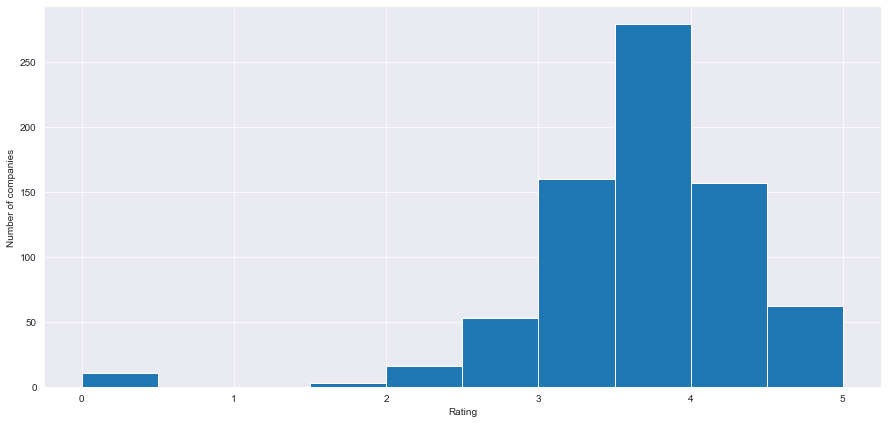

In [52]:
plt.figure(figsize = [15,7])

df3.rating.hist().set(xlabel='Rating', ylabel='Number of companies')

# Rating Vs Number of Companies

[Text(0, 0.5, 'Number of roles'), Text(0.5, 0, 'Average Salary in K $')]

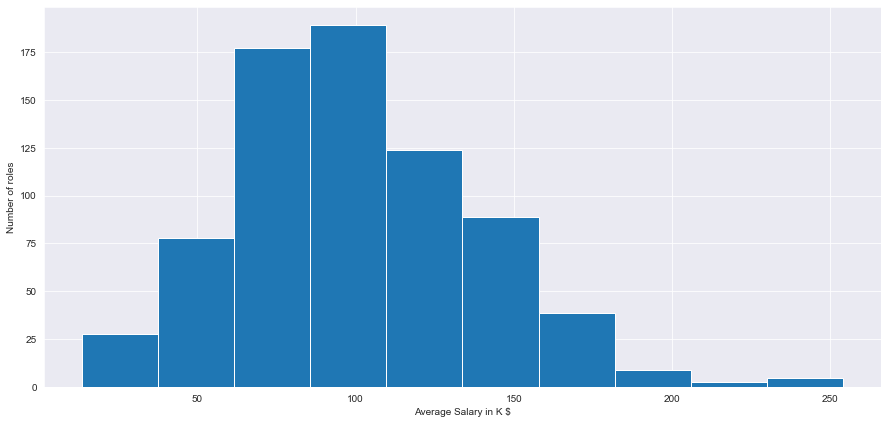

In [53]:
plt.figure(figsize = [15,7])
df3.Avg_Salary.hist().set(xlabel='Average Salary in K $', ylabel='Number of roles')

# Average Salary by number of roles

[Text(0, 0.5, 'Number of companies'), Text(0.5, 0, 'Company age in Years')]

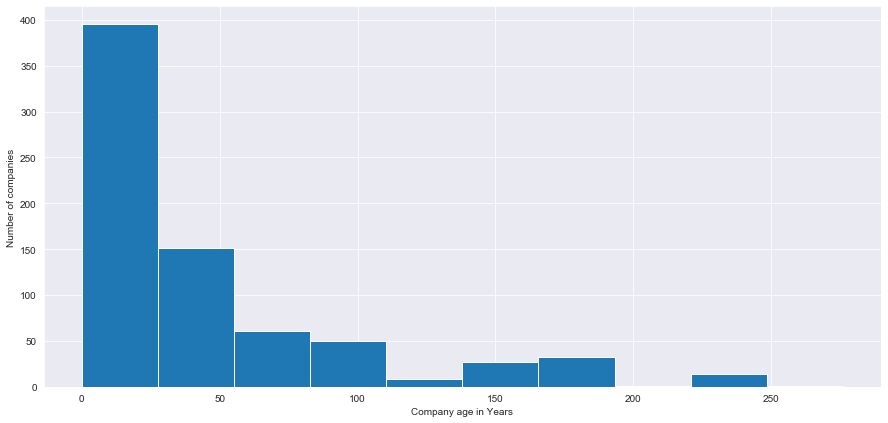

In [54]:
plt.figure(figsize = [15,7])
df3.company_age.hist().set(xlabel='Company age in Years', ylabel='Number of companies')

# Company Age Vs Number of companies

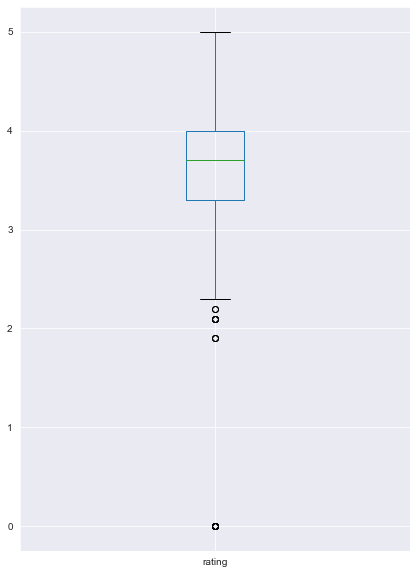

In [55]:
plt.figure(figsize = [7,10])
df3.boxplot(column = 'rating')

# Box plot of ratings in total

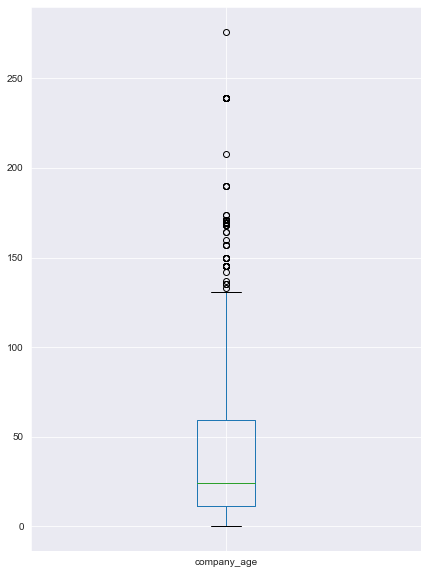

In [56]:

plt.figure(figsize = [7,10])
df3.boxplot(column = 'company_age')

# Box plot of company age

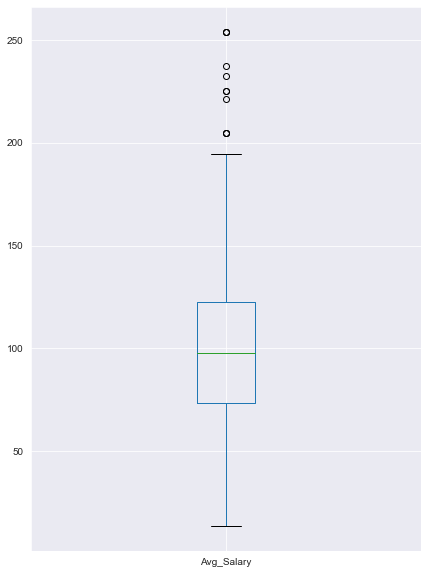

In [57]:
plt.figure(figsize = [7,10])
df3.boxplot(column = 'Avg_Salary')
# Box plot of Average Salary

In [58]:
df3.columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'job_simp', 'seniority', 'hourly', 'employer provided',
       'Avg_Salary', 'company', 'same_state', 'state', 'company_age',
       'python_yn', 'vis_yn', 'sql_yn', 'R_yn', 'PySpark_yn', 'ML_yn',
       'BigData_yn', 'adv_degree', 'rating', 'job_desc', 'compete_num'],
      dtype='object')

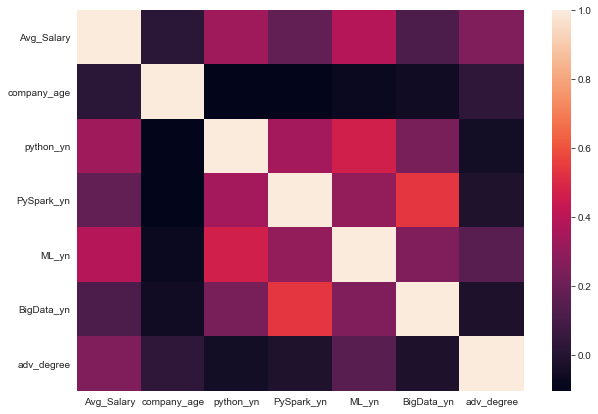

In [59]:
# Plotting a correlation heat map between the columns which had a significant corr values
plt.figure(figsize = [10,7])

sns.heatmap(df3[['Avg_Salary','company_age','python_yn','PySpark_yn','ML_yn','BigData_yn','adv_degree']].corr())

In [60]:
# Getting insights from the graphs

df3_cat = df3[['Size','state','Location','job_simp', 'seniority','Type of ownership','Sector','Industry',
               'Revenue','company_age','ML_yn','python_yn','adv_degree','company','Headquarters' ]]

df3.columns

# Creating df3_cat to plot grpahs between columns

Index(['Job Title', 'Job Description', 'Rating', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'job_simp', 'seniority', 'hourly', 'employer provided',
       'Avg_Salary', 'company', 'same_state', 'state', 'company_age',
       'python_yn', 'vis_yn', 'sql_yn', 'R_yn', 'PySpark_yn', 'ML_yn',
       'BigData_yn', 'adv_degree', 'rating', 'job_desc', 'compete_num'],
      dtype='object')

graph for Industry: Total  = 20


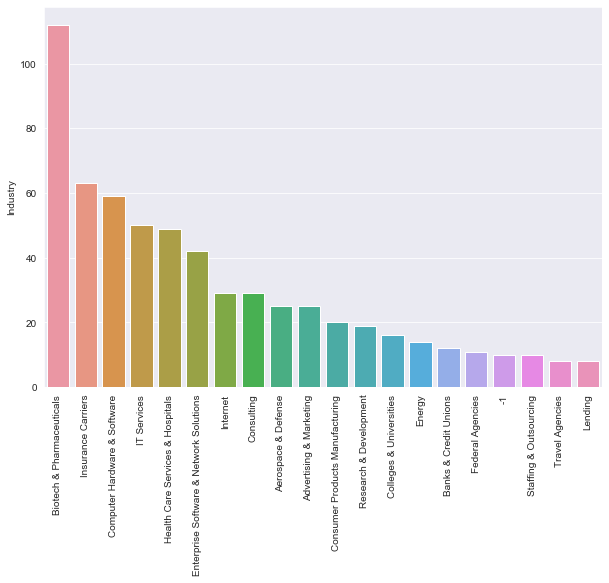

graph for company: Total  = 20


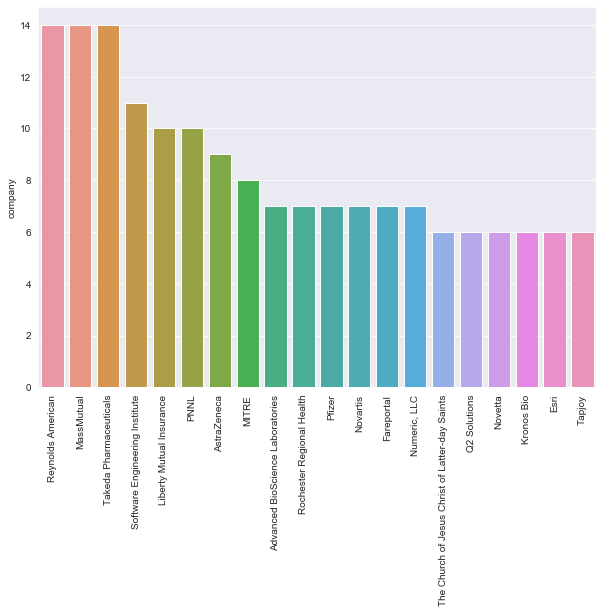

graph for Location: Total  = 20


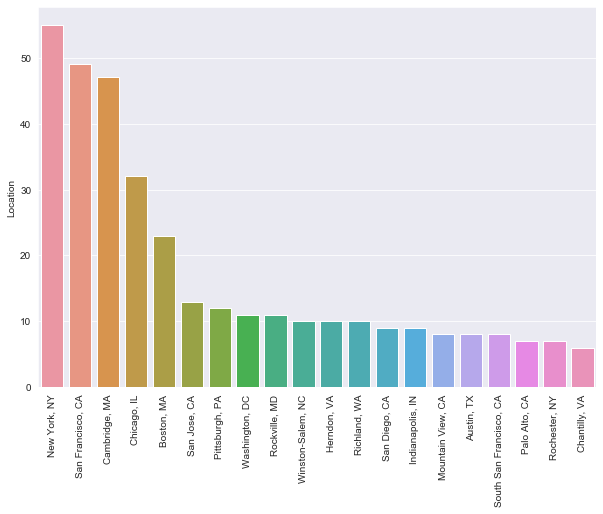

graph for Headquarters: Total  = 20


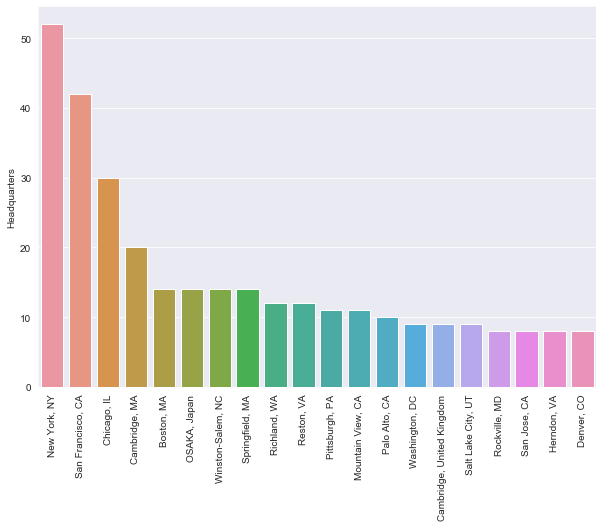

graph for state: Total  = 20


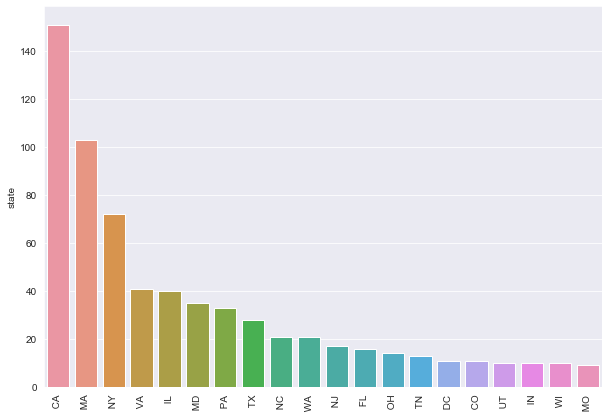

In [61]:
for i in df3_cat[['Industry','company','Location','Headquarters','state']].columns:
    cat_num = df3_cat[i].value_counts()[:20]
    print('graph for %s: Total  = %d' % (i,len(cat_num)))
    plt.figure(figsize = [10,7])
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    
    plt.show()

In [30]:
# Pivot Tables - Salary Dependancy and sorting by avg salaries

pd.pivot_table(df3, index = 'Job Title', values = 'Avg_Salary').sort_values('Avg_Salary',ascending = False)[:10]

# showcasing top 10 paying roles with job titles

,Avg_Salary
Job Title,
"Director II, Data Science - GRM Actuarial",254.0
Principal Machine Learning Scientist,232.5
Principal Data Scientist with over 10 years experience,225.0
Lead Data Engineer,205.0
"Director II, Data Science - GRS Predictive Analytics",194.5
Staff Machine Learning Engineer,181.0
"Director, Data Science",179.5
Principal Data Scientist,176.3
Sr. Scientist II,174.0


In [31]:
pd.pivot_table(df3, index = 'state', values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False)[:10]

# Top 10 State wise Average salaries

,Avg_Salary
state,
CA,123.619205
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [32]:
pd.pivot_table(df3, index = 'Industry', values = 'Avg_Salary').sort_values('Avg_Salary', ascending = False)[:10]

# Top 10 Industry wise average salaries

,Avg_Salary
Industry,
Other Retail Stores,163.500000
Motion Picture Production & Distribution,146.000000
Financial Analytics & Research,145.125000
"Health, Beauty, & Fitness",139.500000
Telecommunications Services,131.500000
Brokerage Services,129.000000
Auctions & Galleries,128.000000
Internet,123.810345
Investment Banking & Asset Management,118.400000


In [36]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df3,index = ['job_simp','state'], 
               values = 'Avg_Salary').sort_values(['job_simp','Avg_Salary'], ascending = False).[:20]

# Forming a statewise and job wise average salary data

SyntaxError: invalid syntax (<ipython-input-36-34a38ed4f971>, line 3)

In [34]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Aneesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Aneesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

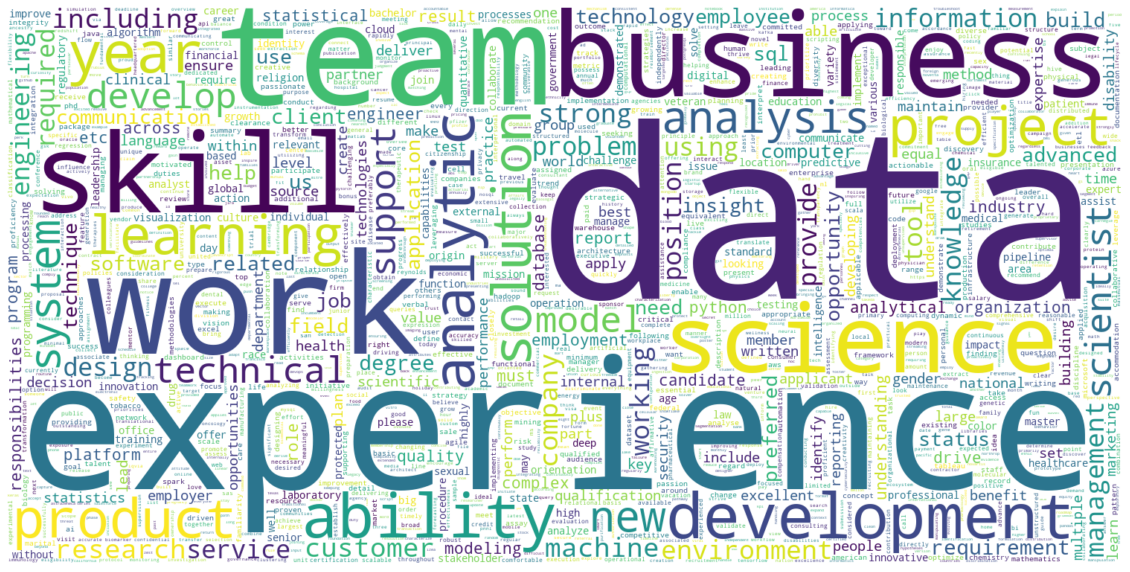

In [35]:
# Making a word cloud based on the job description data tp find most repeating words in dat set

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white",collocations=False,random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 750)
wc.generate(text)

plt.figure(figsize=[20,20])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()


In [74]:
df3.to_csv('EDA Data.csv')